# Mental Health Regression Project

## Introduction

In this project, I'll analyze several mental health datasets that contain information on the prevalence of mental illnesses, adult mental health coverage, depressive symptoms in the US population, and global reporting on mental disorders. The goal is to build a regression model that predicts the prevalence of Eating disorders (as a proxy for mental health challenges) based on other mental health metrics such as Schizophrenia, Depressive disorders, Anxiety disorders, and Bipolar disorders.

Problem Statement:
I want to aim to understand the relationships between mental health indicators and predict the prevalence of Eating disorders using a linear regression model. By doing so, I can help discover some patterns and contribute to a broader understanding of mental health issues in our world!

the relationships among various mental health indicators and predict the prevalence of Eating disorders using a linear regression model. This analysis can help uncover potential patterns and contribute to a broader understanding of mental health issues.


**Datasets Used:**
- `1-mental-illnesses-prevalence.csv`
- `4-adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv`
- `6-depressive-symptoms-across-us-population.csv`
- `7-number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv`



## What is Regression?

Regression is a statistical technique used to model the relationship between a dependent variable (target) and one or more independent variables (features). In this project, I will use Linear Regression, which estimates a linear relationship between the features and the target.

## Linear Regression Formula

The formula for a linear regression model is:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
$$

**Where:**

- $y$ is the predicted outcome.
- $\beta_0$ is the intercept (constant term).
- $\beta_1, \beta_2, \dots, \beta_n$ are the coefficients for the features $x_1, x_2, \dots, x_n$.
- $\epsilon$ represents the error term, also known as noise.

The model finds the coefficients by minimizing the sum of squared errors, which is the difference between the actual and predicted values.

Source(For how to display equations): 
https://saturncloud.io/blog/how-to-use-latex-in-jupyter-notebook/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn import metrics


# For graphs
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

## Data Loading and Exploration

Now, we load each dataset and perform an initial exploratory data analysis (EDA) to understand the data structure, identify any missing values, and explore the correlations among features.


In [5]:
# Loading the Datasets

# Update the file paths as necessary:
data1 = pd.read_csv("1-mental-illnesses-prevalence.csv")
data2 = pd.read_csv("4-adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
data3 = pd.read_csv("6-depressive-symptoms-across-us-population.csv")
data4 = pd.read_csv("7-number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")


In [6]:
#Creating dataframes for organizing data and making it easier to manipulate

df1 = data1.copy()
df2 = data2.copy()
df3 = data3.copy()
df4 = data4.copy()

## Data Overview and Initial Analysis

In [8]:
# Describing my Data

def describe_df(dataframe):
    summary = pd.DataFrame({
        'Variable': dataframe.columns,
        'Type': [dataframe[col].dtype for col in dataframe.columns],
        'Count': [dataframe[col].count() for col in dataframe.columns],
        'Unique': [dataframe[col].nunique() for col in dataframe.columns],
        'Missing': [dataframe[col].isna().sum() for col in dataframe.columns]
    })
    return summary

# Display summary information for each dataset
print("Mental Illness Prevalence")
print(describe_df(data1))
print("\nAdult Population Data")
print(describe_df(data2))
print("Depressive Symptoms Data")
print(describe_df(data3))
print("Countries Data")
print(describe_df(data4))


Mental Illness Prevalence
                                            Variable     Type  Count  Unique  \
0                                             Entity   object   6420     214   
1                                               Code   object   6150     205   
2                                               Year    int64   6420      30   
3  Schizophrenia disorders (share of population) ...  float64   6420    6406   
4  Depressive disorders (share of population) - S...  float64   6420    6416   
5  Anxiety disorders (share of population) - Sex:...  float64   6420    6417   
6  Bipolar disorders (share of population) - Sex:...  float64   6420    6385   
7  Eating disorders (share of population) - Sex: ...  float64   6420    6417   

   Missing  
0        0  
1      270  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  

Adult Population Data
            Variable     Type  Count  Unique  Missing
0             Entity   object     22      22        0
1    

## Experiment 1: Data Pre-processing step ###

 - I am going to handle missing values 
 -  rename columns changing long or unclear column names
 -  transform data types and handle special values 

In [10]:
data2.replace(to_replace="<0.1", value=0.1, regex=True, inplace=True)
data2['Schizophrenia'] = data2['Schizophrenia'].astype(float)

# renaming columns
data1 = data1.rename(columns={
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating'
})
print(data1.head())

        Entity Code  Year  Schizophrenia  Depressive   Anxiety   Bipolar  \
0  Afghanistan  AFG  1990       0.223206    4.996118  4.713314  0.703023   
1  Afghanistan  AFG  1991       0.222454    4.989290  4.702100  0.702069   
2  Afghanistan  AFG  1992       0.221751    4.981346  4.683743  0.700792   
3  Afghanistan  AFG  1993       0.220987    4.976958  4.673549  0.700087   
4  Afghanistan  AFG  1994       0.220183    4.977782  4.670810  0.699898   

     Eating  
0  0.127700  
1  0.123256  
2  0.118844  
3  0.115089  
4  0.111815  


## Experiment 1: Removing outliers ##

In [12]:
#Outliers can add noise so I will remove then 
def remove_outliers(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Eating']:
    data1 = remove_outliers(data1, col)

print("Data1 shape after outlier removal:", data1.shape)

Data1 shape after outlier removal: (5385, 8)


## Experiment 1: Modeling the Linear Regression ###

 - The target variable is Eating and the prevalence of eating disorders
 - Predictors are Schizophrenia, Depressive, Anxiety, and Bipolar

In [14]:
# Define features and target using data1
features = ['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Year']
X_model = data1[features]
y_model = data1['Eating']

# Normalize the features
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_model)

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_model, test_size=0.2, random_state=42)
print("Shapes:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Create and train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

Shapes: (4308, 5) (4308,) (1077, 5) (1077,)


## Experiment 1: Evaluation ##

- Im going to evaluate the model using:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Mean Squared Error (RMSE) 
- R^2 Score

In [16]:
mae  = metrics.mean_absolute_error(y_test, y_pred)
mse  = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

# Cross-validation using KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_model, X_norm, y_model, cv=kf)
print("Cross-validation scores:", cv_scores)


Mean Absolute Error: 0.0287522755607658
Mean Squared Error: 0.0017402886516068824
Root Mean Squared Error: 0.041716767032056574
R2 Score: 0.7230329979702041
Cross-validation scores: [0.71806194 0.72673833 0.70926981 0.72757891 0.75874361 0.75846172
 0.68405901 0.72992344 0.68967148 0.74736259]


## Data Visualizations ##

### Interactive Bar Chart 

- from metrics in data2

In [19]:
# Major Depression by Entity
data2.sort_values(by="Major depression", inplace=True)
fig1 = px.bar(data2, x="Major depression", y="Entity", orientation='h',
              color="Bipolar disorder", title="Major Depression by Entity (colored by Bipolar Disorder)")
fig1.show()

# Eating Disorders by Entity 
data2.sort_values(by="Eating disorders", inplace=True)
fig2 = px.bar(data2, x="Eating disorders", y="Entity", orientation='h',
              color="Dysthymia", title="Eating Disorders by Entity (colored by Dysthymia)")
fig2.show()

# Schizophrenia by Entity 
data2.sort_values(by="Schizophrenia", inplace=True)
fig3 = px.bar(data2, x="Schizophrenia", y="Entity", orientation='h',
              color="Anxiety disorders", title="Schizophrenia by Entity (colored by Anxiety Disorders)")
fig3.show()


## Subplots

- Comparing bipolar disorder and major depression

In [21]:
entities = data2["Entity"].tolist()
fig_sub = make_subplots(rows=1, cols=2, shared_yaxes=True)
fig_sub.add_trace(
    go.Bar(x=data2["Bipolar disorder"], y=entities, orientation='h', name="Bipolar Disorder"),
    row=1, col=1
)
fig_sub.add_trace(
    go.Scatter(x=data2["Major depression"], y=entities, mode='lines+markers', name="Major Depression"),
    row=1, col=2
)
fig_sub.update_layout(title="Comparison of Major Depression and Bipolar Disorder")
fig_sub.show()


## Vizualizing Depressive Symptoms Using Line Plot

In [23]:
symptom_types = ["Appetite change", "Average across symptoms", "Depressed mood",
                 "Difficulty concentrating", "Loss of interest", "Low energy",
                 "Low self-esteem", "Psychomotor agitation", "Sleep problems", "Suicidal ideation"]

fig_symp = go.Figure()
fig_symp.add_trace(go.Scatter(x=symptom_types, y=data3["Nearly every day"],
                              mode='lines+markers', name="Nearly every day"))
fig_symp.add_trace(go.Scatter(x=symptom_types, y=data3["More than half the days"],
                              mode='lines+markers', name="More than half the days"))
fig_symp.add_trace(go.Scatter(x=symptom_types, y=data3["Several days"],
                              mode='lines+markers', name="Several days"))
fig_symp.update_layout(title="Depressive Symptoms Frequency",
                       xaxis_title="Symptom", yaxis_title="Frequency (%)")
fig_symp.show()


## Global Reporting on Mental Illness Visualized

In [25]:
illnesses = ["Alcohol use disorders", "Amphetamine use disorders", "Anorexia nervosa", "Anxiety disorders",
             "Attention-deficit hyperactivity disorder", "Autism spectrum disorders", "Bipolar disorder",
             "Bulimia nervosa", "Cannabis use disorders", "Cocaine use disorders", "Dysthymia", "Major depressive disorder",
             "Opioid use disorders", "Other drug use disorders", "Personality disorders"]

fig_global = go.Figure()
fig_global.add_trace(go.Scatter(x=illnesses, y=data4["Number of countries with primary data on prevalence of mental disorders"],
                                mode='lines+markers', name="Countries Reporting"))
fig_global.update_layout(title="Global Reporting on Mental Disorders",
                         xaxis_title="Illness", yaxis_title="Number of Countries")
fig_global.show()


## Time Series Comparison for Ameirca vs. China

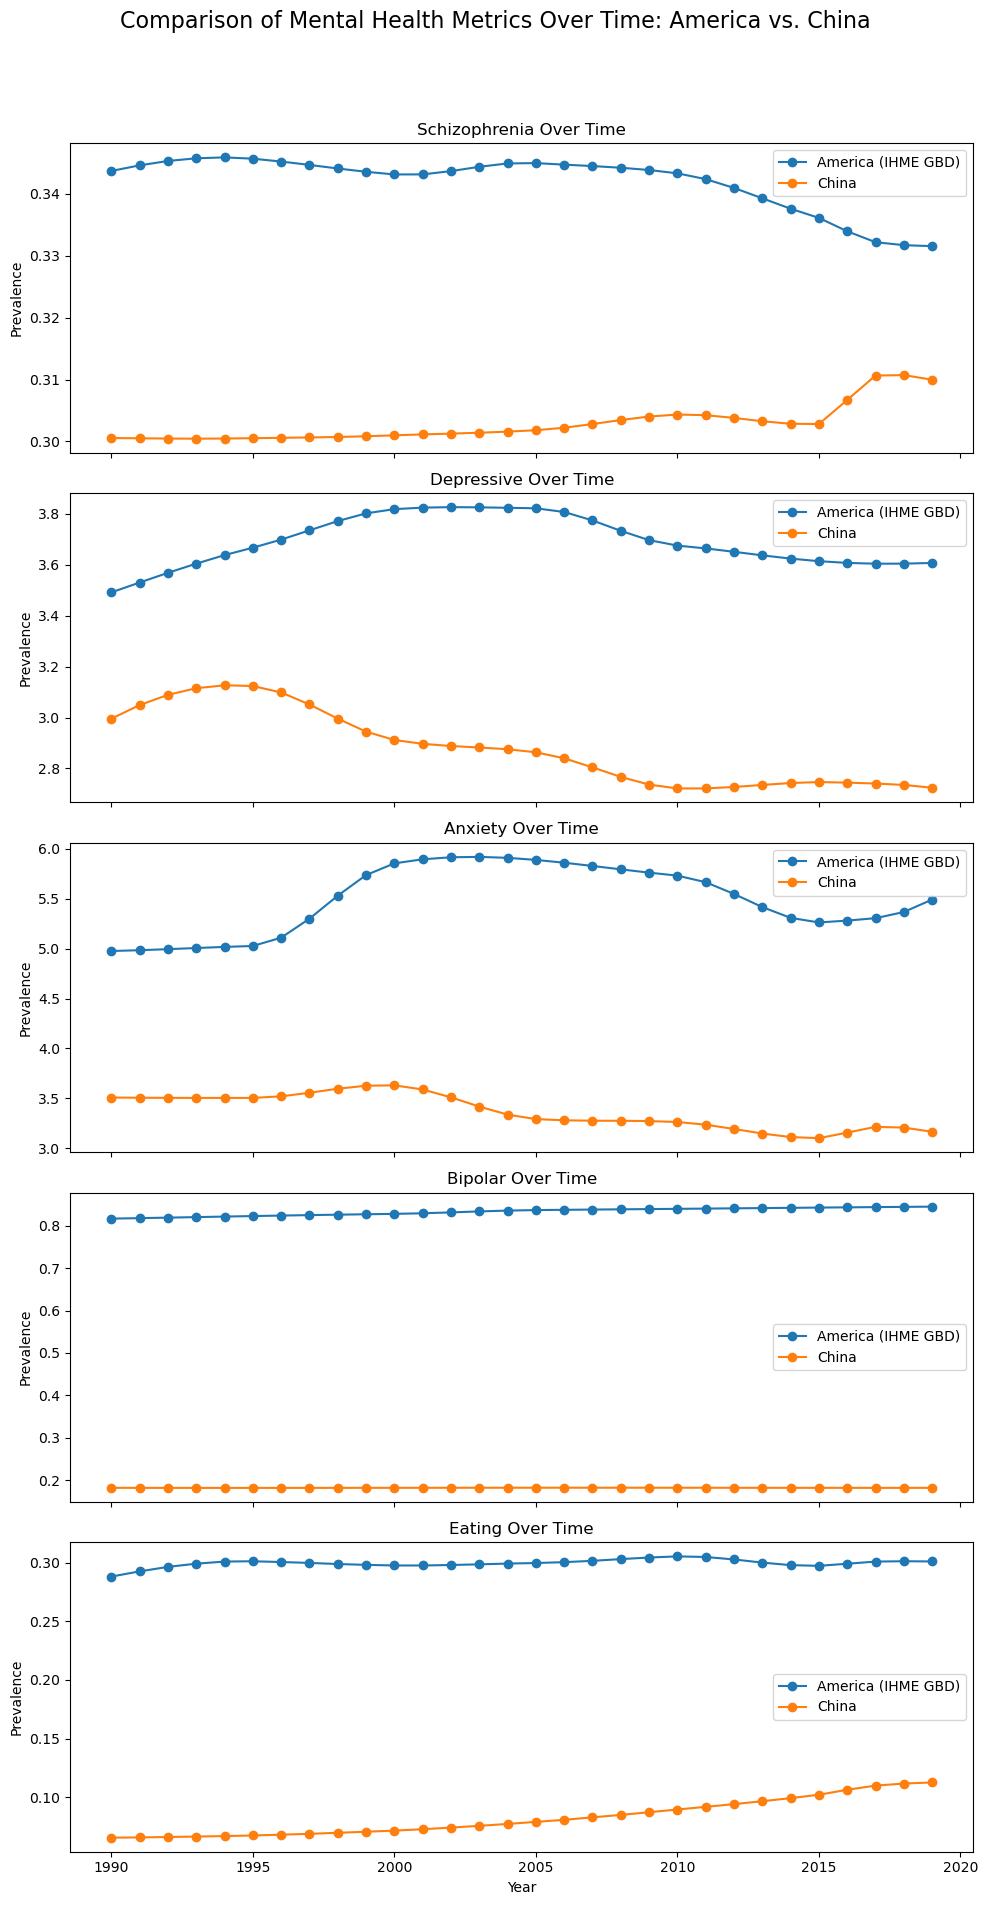

In [28]:
countries = ["America (IHME GBD)", "China"]
df_countries = data1[data1["Entity"].isin(countries)]


metrics_list = ["Schizophrenia", "Depressive", "Anxiety", "Bipolar", "Eating"]

fig, axes = plt.subplots(nrows=len(metrics_list), ncols=1, figsize=(10, 20), sharex=True)

for i, metric in enumerate(metrics_list):
    for country in countries:
         df_country = df_countries[df_countries["Entity"] == country]
         axes[i].plot(df_country["Year"], df_country[metric], marker='o', label=country)
    axes[i].set_title(f"{metric} Over Time")
    axes[i].set_ylabel("Prevalence")
    axes[i].legend()
    
plt.xlabel("Year")
plt.suptitle("Comparison of Mental Health Metrics Over Time: America vs. China", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Time Series Comparison for Ameirca vs. India

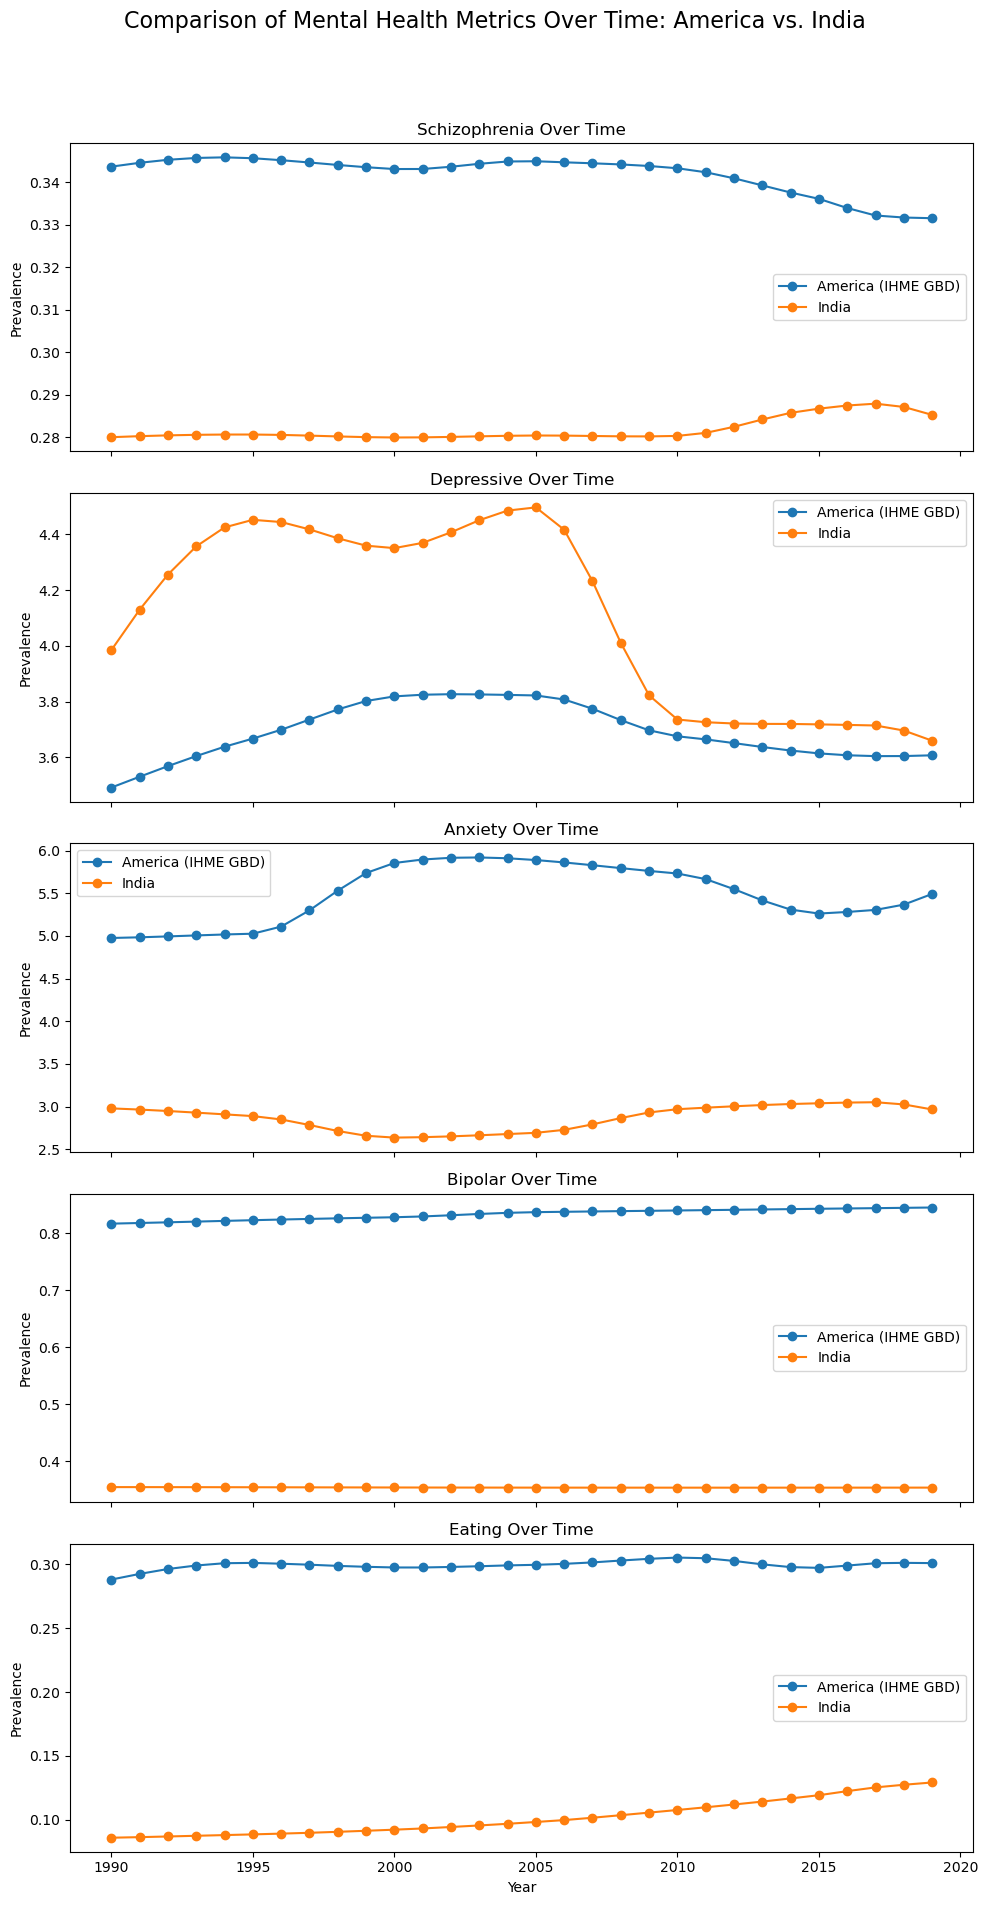

In [36]:
countries = ["America (IHME GBD)", "India"]
df_countries = data1[data1["Entity"].isin(countries)]


metrics_list = ["Schizophrenia", "Depressive", "Anxiety", "Bipolar", "Eating"]

fig, axes = plt.subplots(nrows=len(metrics_list), ncols=1, figsize=(10, 20), sharex=True)

for i, metric in enumerate(metrics_list):
    for country in countries:
         df_country = df_countries[df_countries["Entity"] == country]
         axes[i].plot(df_country["Year"], df_country[metric], marker='o', label=country)
    axes[i].set_title(f"{metric} Over Time")
    axes[i].set_ylabel("Prevalence")
    axes[i].legend()
    
plt.xlabel("Year")
plt.suptitle("Comparison of Mental Health Metrics Over Time: America vs. India", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Observing Pairwise Relationships

In [39]:
fig_matrix = px.scatter_matrix(data1,
                            dimensions=features,
                            color = "Year",
                            title="Scatter Matrix of Mental Health Variables",
                            height=800,
                            width=680)
fig_matrix.show()


## Histogram of Mental Health Variables

In [41]:
for col in features + ['Eating']:
    fig_hist = px.histogram(data1, x=col, title=f"Histogram of {col}")
    fig_hist.show()

## Experiment 2: Upgrading the model using Polynomial Features

What I changed:

In this experiment, I'm aiming to capture non-linear relationships between mental health metrics by introducing polynomial features of degree 2. 

In [43]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_model)
X_poly_norm = scaler.fit_transform(X_poly)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_norm, y_model, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)
r2_poly = metrics.r2_score(y_test_poly, y_pred_poly)
print("R2 Score with Polynomial Features:", r2_poly)


R2 Score with Polynomial Features: 0.749810311627173


### Results:

The R2 score increased slightly compared to the first experiment, indicating that the polynomial features helped the model better capture the complexity of relationships between variables.

## Experiment 3: Creating Interaction Terms Manually

In the third experiment, I'm introducing interaction terms to model potential interactions between pairs of features. This approach aims to capture the combined effects of variables that might not be evident when considered individually.

In [46]:
data1['Interaction_Dep_Schiz'] = data1['Depressive'] * data1['Schizophrenia']
data1['Interaction_Bip_Anx'] = data1['Bipolar'] * data1['Anxiety']

features_ext = features + ['Interaction_Dep_Schiz', 'Interaction_Bip_Anx']
X_ext = data1[features_ext]
X_ext_norm = scaler.fit_transform(X_ext)

X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_ext_norm, y_model, test_size=0.2, random_state=42)

ext_model = LinearRegression()
ext_model.fit(X_train_ext, y_train_ext)
y_pred_ext = ext_model.predict(X_test_ext)
r2_ext = metrics.r2_score(y_test_ext, y_pred_ext)
print("R2 Score with Interaciton Terms:", r2_ext)

R2 Score with Interaciton Terms: 0.7312981740181552


### Results:

The R2 score decreased slightly compared to the second experiment. The correlation matrix revealed that the new interaction features introduced multicollinearity, potentially affecting the model's predictive power.

## Received a Slightly Lower R2 Score -> Checking Correlation Among Features

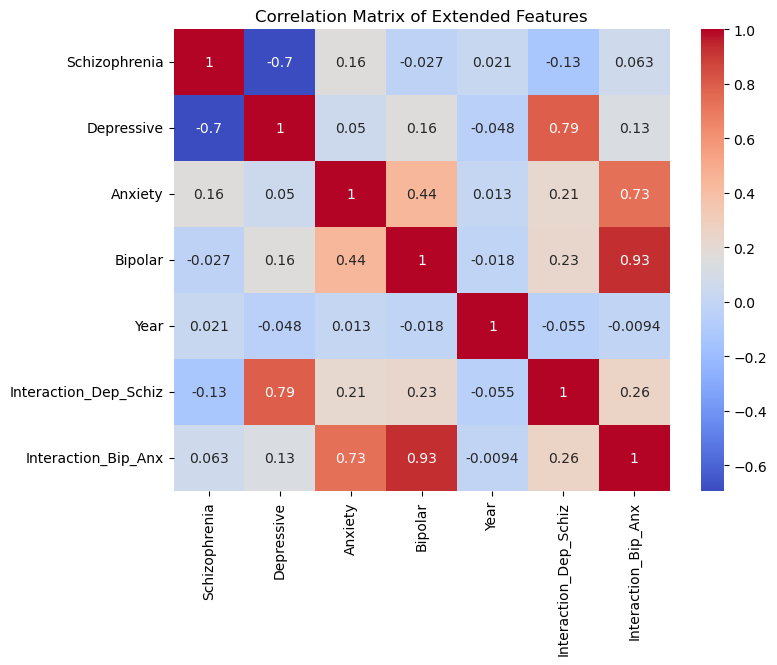

In [53]:
corr_matrix_ext = data1[features_ext].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_ext, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Extended Features")
plt.show()


## Finally Lets Vizualize the Model Predections

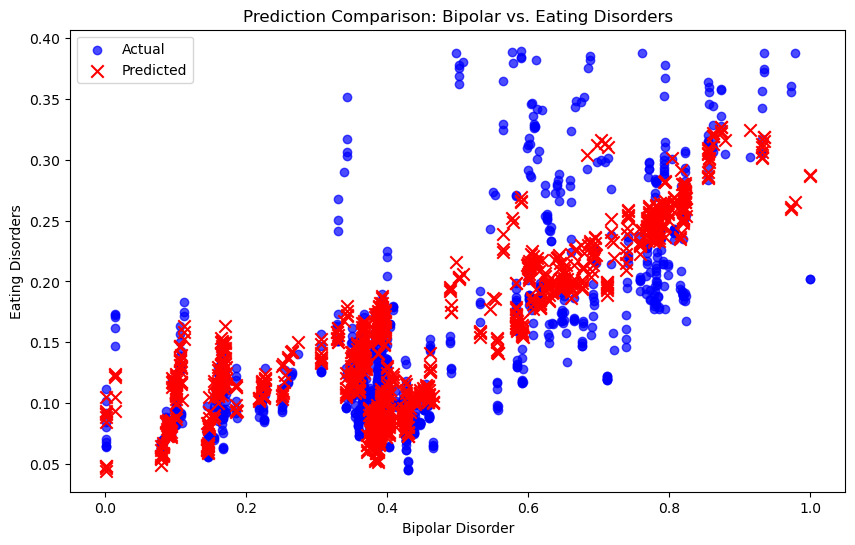

In [55]:
plt.figure(figsize=(10, 6))
bipolar_index = features_ext.index('Bipolar')
plt.scatter(X_test_ext[:, bipolar_index], y_test_ext, color='blue', alpha=0.7, label="Actual")
plt.scatter(X_test_ext[:, bipolar_index], y_pred_ext, color='red', marker='x', s=80, label="Predicted")
plt.xlabel("Bipolar Disorder")
plt.ylabel("Eating Disorders")
plt.title("Prediction Comparison: Bipolar vs. Eating Disorders")
plt.legend()
plt.show()


## Anaylsis of Predictions

 ### Observations: 
 This model does generally follow the trend, but you can see it struggles in areas with higher variance, especially between 0.2-0.6

 ### Outliers:
 Some of the predicted points that significantly differ from actual values, which show the model's difficulty handling edge cases or non-linear relationships.



## Impact Section

The visualization above reveals a few important considerations regarding the impact of the model:

Social and Health Implications:

- While the model can moderately predict Eating Disorders from Bipolar Disorder, the variability at intermediate values shows that the relationship   between these mental health metrics may be more complex than a simple linear correlation.

- Predicting mental health outcomes requires a nuanced approach, as relying solely on one predictor (like Bipolar Disorder) may result in misleading conclusions in real-world applications.

Ethical Considerations:

- Visual evidence can show us that predictions may be less reliable in certain ranges, highlighting the need for caution when using the model to influence healthcare decisions.

- The existence of outliers and incorrect predictions may contribute to bias if these predictions are used without proper context or additional data validation.

Practical Impact:

Further refinements, like incorporating additional features or non-linear models, may enhance the prediction accuracy, especially in areas where the model shows inconsistency

## Conclusion

- The model performs reasonably well in predicting Eating Disorders from Bipolar Disorder, but the variability in predictions really shows that simple linear regression may not fully capture the relationships.

- Inconsistencies I have seen in the mid-range of Bipolar Disorder values show the model's sensitivity to variance, indicating that interaction effects or non-linear models might yield better results.

- The visualization also revealed the presence of outliers, suggesting that more robust outlier detection and handling might improve model performance.

- Some improvements I could make in the Future:

     - Outlier Handling: Implement methods to detect and manage outliers, as they significantly affect model performance.
     - Robust Regression methods: Apply methods like Regularized Regression Ridge or Lasso or even Ensemble Methods that might would give the model more consistent predictions
     - Dimensionality: This project's focus was regression, but to better understand the relationship between these health metrics, it would be valuable to explore some clustering techniques or principal component analysis to reduce dimensionality and focus on the very most informative features.
     - Feature Engineering: I could add more nuanced interaction terms that could improve accuracy specifically for the intermediate range.

All in all, I really enjoyed working on this project and was able to learn a lot and come out a lot more knowledgeable about Regression techniques. Specifically gaining insight into how linear and polynomial regression work and how interaction terms can both positively and even negatively impact your model. Working through these challenges has truly given me a deeper understanding of model building and really just the practical aspects of data analysis and data mining. Even though, I still believe I have a lot to learn and can't wait for my next project!

Through building and evaluating different models, I gained valuable insights into how linear and polynomial regressions work and how interaction terms can both positively and negatively impact model performance. Working through the challenges of data variability and multicollinearity has given me a deeper understanding of the practical aspects of data analysis and model building.

## Sources 

data1: https://www.kaggle.com/code/imtkaggleteam/mental-health-eda-prediction/input?select=1-+mental-illnesses-prevalence.csv

data2: https://www.kaggle.com/code/imtkaggleteam/mental-health-eda-prediction/input?select=4-+adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv

data3: https://www.kaggle.com/code/imtkaggleteam/mental-health-eda-prediction/input?select=6-+depressive-symptoms-across-us-population.csv

data4: https://www.kaggle.com/code/imtkaggleteam/mental-health-eda-prediction/input?select=7-+number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv

Other: https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/


